In [1]:
import utils
from tensorflow.keras.optimizers import Adam
import tensorflow as tf
import keras
keras.utils.set_random_seed(812)
tf.config.experimental.enable_op_determinism()
import pandas as pd
import numpy as np

### Data augmentation:

In [2]:
# Création du générateur d'images avec les augmentations de données
img_generator = utils.create_image_generator()

# Définition du répertoire des données et des classes
data_dir = 'data'

# Création des générateurs de données pour l'entraînement et la validation
train_generator, validation_generator = utils.create_data_generators(img_generator, data_dir, batch_size=16)

Found 389 images belonging to 3 classes.
Found 96 images belonging to 3 classes.


#### Création du modèle VGG16:

In [3]:
model_vgg = utils.create_vgg_model()

#### Compilation du modèle vgg:

In [4]:
learning_rate = 1e-4
model_vgg.compile(optimizer=Adam(learning_rate=learning_rate),
                loss='categorical_crossentropy',
                metrics=['accuracy'])


#### Affichage du modèle vgg:

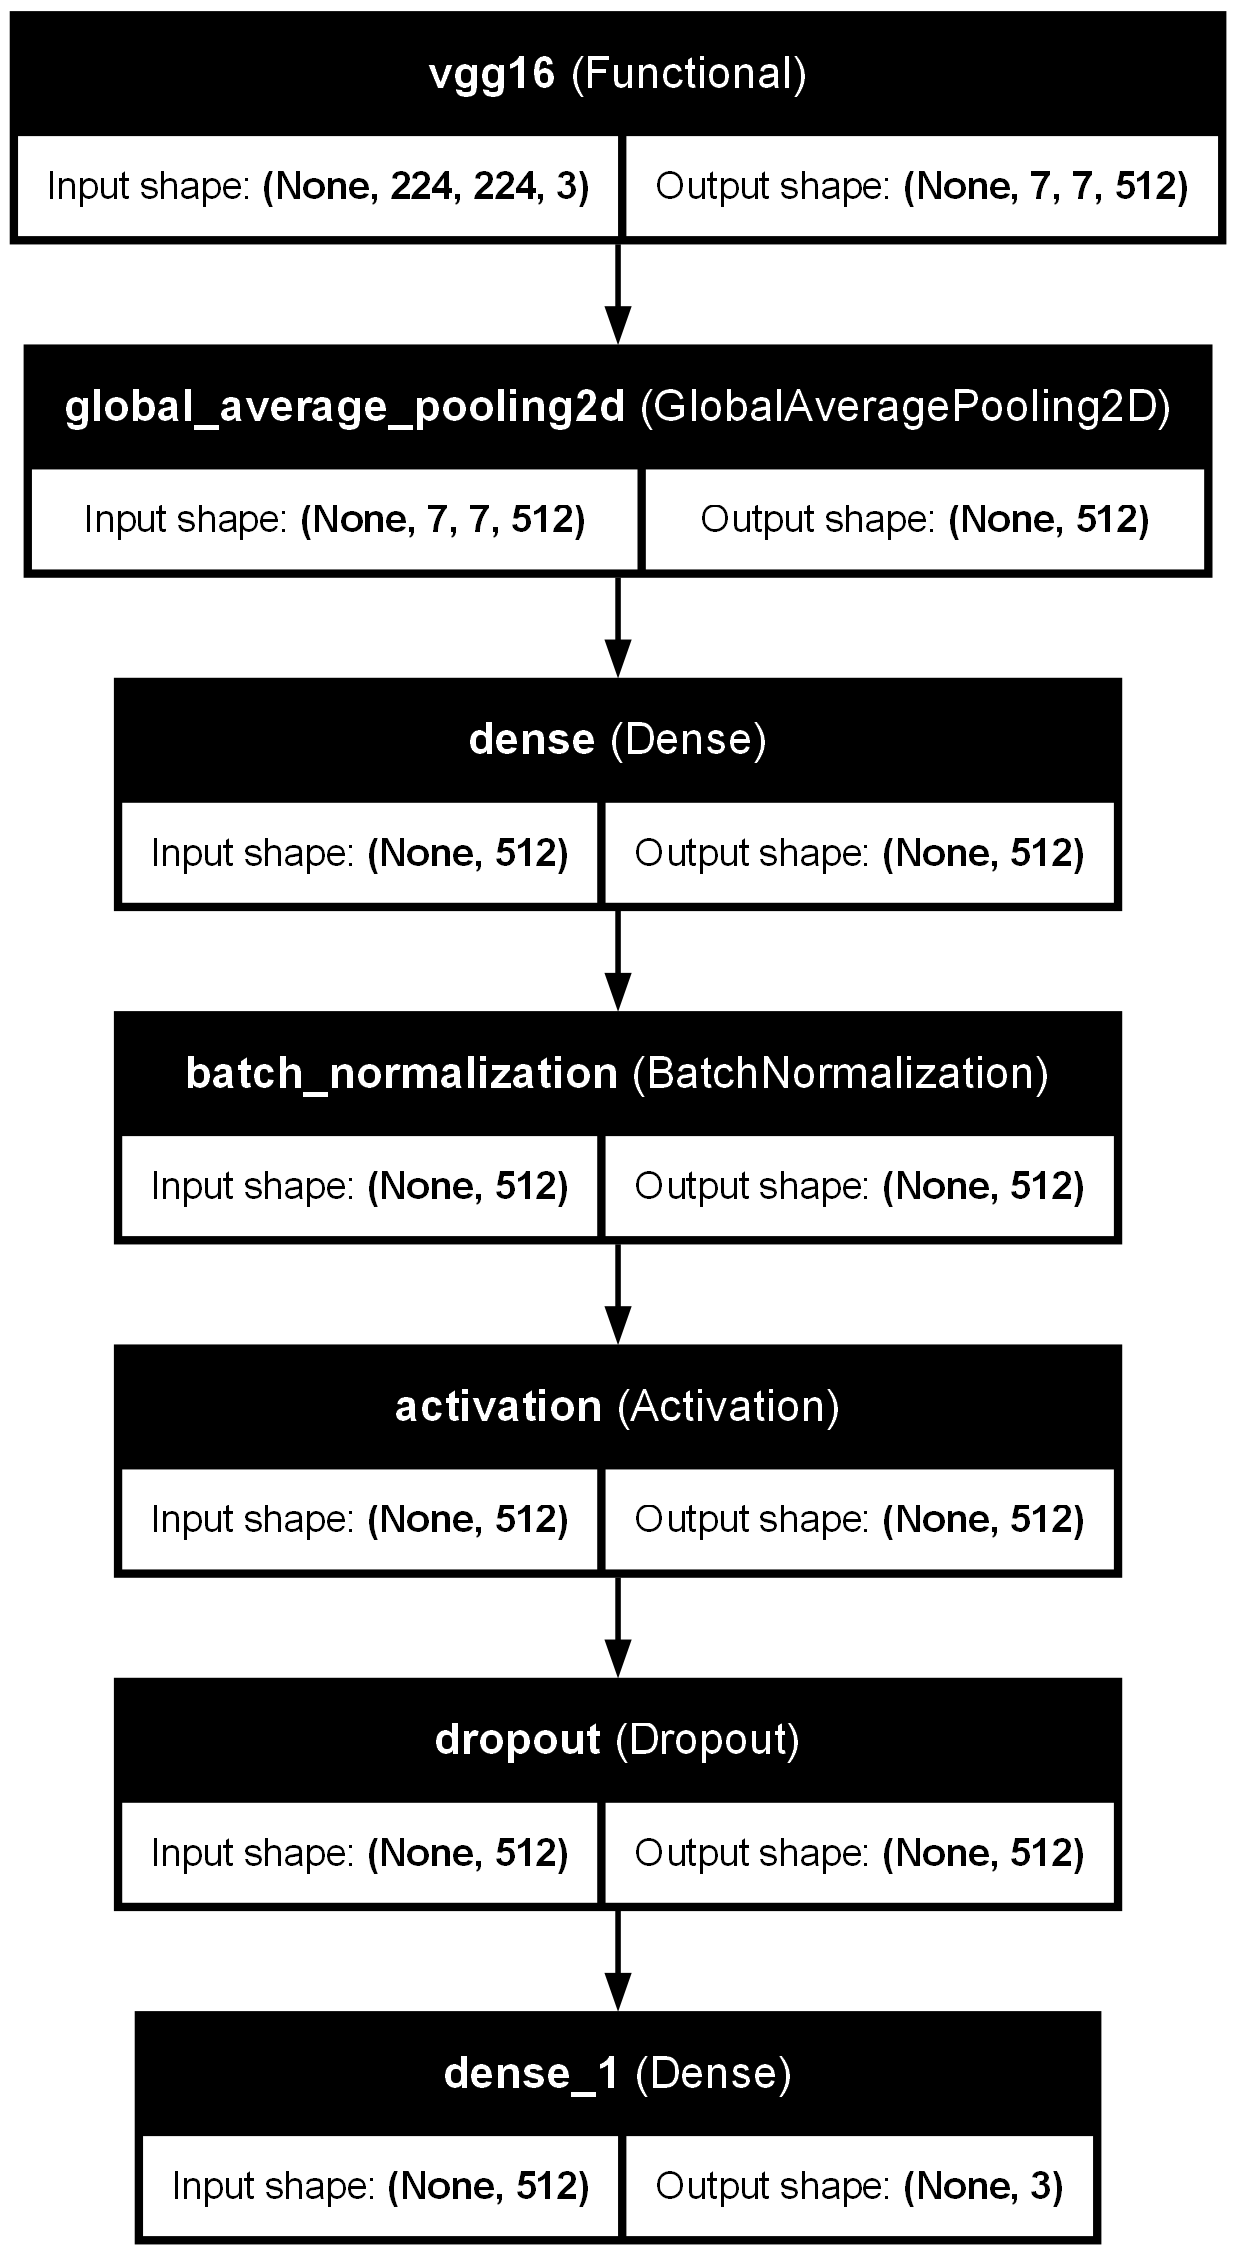

In [5]:
tf.keras.utils.plot_model(model_vgg, show_shapes=True, show_layer_names=True)

#### Résumé du modèle vgg:

In [6]:
model_vgg.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ vgg16 (Functional)              │ (None, 7, 7, 512)      │    14,714,688 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 512)            │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │       262,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 512)            │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation (Activation)         │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 3)              │         1,539 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,980,931 (57.15 MB)

 Trainable params: 265,219 (1.01 MB)

 Non-trainable params: 14,715,712 (56.14 MB)

#### Entrainement du modèle vgg:

In [7]:
history_vgg = model_vgg.fit(
  train_generator,
  epochs=100,
  validation_data=validation_generator
)

Epoch 1/100


c:\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


25/25 ━━━━━━━━━━━━━━━━━━━━ 24s 851ms/step - accuracy: 0.3228 - loss: 1.3813 - val_accuracy: 0.3125 - val_loss: 1.1982
Epoch 2/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 22s 828ms/step - accuracy: 0.3490 - loss: 1.2634 - val_accuracy: 0.3125 - val_loss: 1.1701
Epoch 3/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 22s 832ms/step - accuracy: 0.5474 - loss: 0.9402 - val_accuracy: 0.3438 - val_loss: 1.1119
Epoch 4/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 22s 833ms/step - accuracy: 0.6625 - loss: 0.7824 - val_accuracy: 0.3958 - val_loss: 1.0557
Epoch 5/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 22s 839ms/step - accuracy: 0.6753 - loss: 0.8090 - val_accuracy: 0.4896 - val_loss: 1.0036
Epoch 6/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 22s 836ms/step - accuracy: 0.7190 - loss: 0.6776 - val_accuracy: 0.5833 - val_loss: 0.9691
Epoch 7/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 22s 844ms/step - accuracy: 0.7256 - loss: 0.6675 - val_accuracy: 0.5729 - val_loss: 0.9586
Epoch 8/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 22s 838ms/step - accuracy: 0.7430 - loss: 0.6513 - val_accuracy

#### Calcul des prédictions et des classes réelles

In [8]:
# Calcul des prédictions et des classes réelles
y_pred = model_vgg.predict(validation_generator)  # Prédictions du modèle sur les données de validation
y_true = validation_generator.classes          # Les vraies étiquettes des données de validation
y_pred_classes = np.argmax(y_pred, axis=1)     # Conversion des prédictions en classes prédominantes

6/6 ━━━━━━━━━━━━━━━━━━━━ 5s 750ms/step


#### Tracer la matrice de confusion:

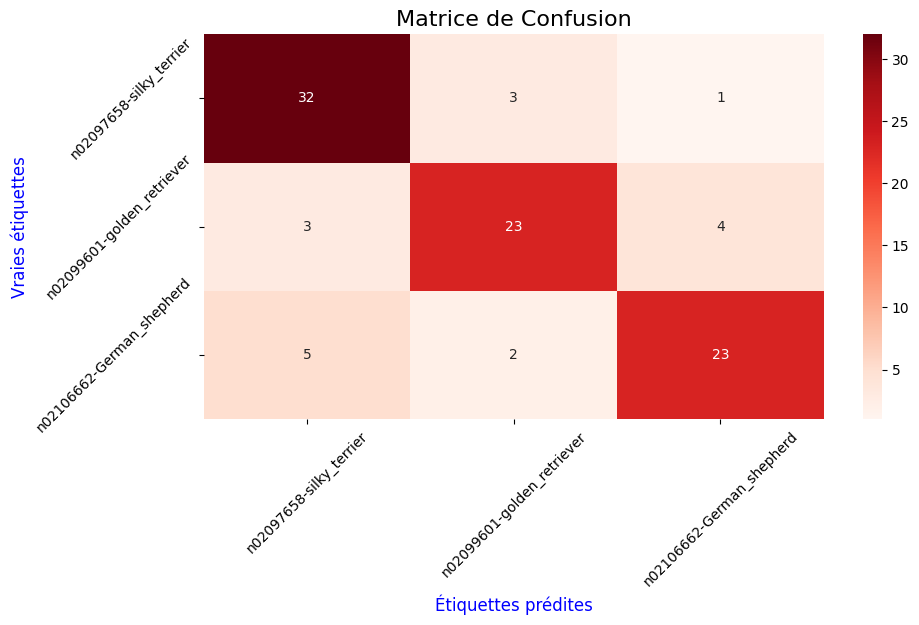

In [9]:
class_names = list(train_generator.class_indices.keys())
utils.plot_confusion_matrix(y_true, y_pred_classes, class_names)

In [10]:
df_report_vgg16 = utils.classification_report_df(y_true, y_pred_classes, class_names)
display(df_report_vgg16)

,precision,recall,f1-score,support
n02097658-silky_terrier,0.80,0.89,0.84,36.00
n02099601-golden_retriever,0.82,0.77,0.79,30.00
n02106662-German_shepherd,0.82,0.77,0.79,30.00
accuracy,0.81,0.81,0.81,0.81
macro avg,0.81,0.81,0.81,96.00
weighted avg,0.81,0.81,0.81,96.00


### Conclusion du modèle VGG16 :

### Analyse Détaillée de la Matrice de Confusion

1. **Silky Terrier** :
   - **Vrais Positifs (TP)** : 32 Silky Terriers sont correctement identifiés.
   - **Faux Négatifs (FN)** : 4 Silky Terriers sont incorrectement classifiés comme d'autres races (3 comme Golden Retrievers, 1 comme German Shepherds).
   - **Faux Positifs (FP)** : 8 prédictions incorrectes où 3 des Golden Retrievers et 5 des German Shepherds sont faussement identifiés comme Silky Terriers.

2. **Golden Retriever** :
   - **Vrais Positifs (TP)** : 23 Golden Retrievers sont correctement identifiés.
   - **Faux Négatifs (FN)** : 7 Golden Retrievers sont incorrectement classifiés comme d'autres races (3 comme Silky Terriers, 4 comme German Shepherds).
   - **Faux Positifs (FP)** : 5 prédictions incorrectes où 3 des Silky Terriers et 2 des German Shepherds sont faussement identifiés comme Golden Retrievers.

3. **German Shepherd** :
   - **Vrais Positifs (TP)** : 23 German Shepherds sont correctement identifiés.
   - **Faux Négatifs (FN)** : 7 German Shepherds sont incorrectement classifiés comme d'autres races (5 comme Silky Terriers, 2 comme Golden Retrievers).
   - **Faux Positifs (FP)** : 5 prédictions incorrectes où 1 des Silky Terriers et 4 des Golden Retrievers sont faussement identifiés comme German Shepherds.

### Analyse Détaillée de la Classification :

Le modèle **VGG16** affiche une performance solide dans la classification des races de chiens, avec une accuracy (précision globale) de **81%**. Les scores F1 pour chaque classe montrent un bon équilibre entre la précision et le rappel, reflétant une classification globalement précise. Voici les résultats spécifiques pour chaque race :

- **Silky Terrier** :
  - **Précision** : 80%
  - **Rappel** : 89%
  - **F1-score** : 84%

- **Golden Retriever** :
  - **Précision** : 82%
  - **Rappel** : 77%
  - **F1-score** : 79%

- **German Shepherd** :
  - **Précision** : 82%
  - **Rappel** : 77%
  - **F1-score** : 79%

Bien que la performance sur les **Silky Terriers** soit notablement meilleure, des améliorations sont encore nécessaires pour mieux identifier les **Golden Retrievers** et **German Shepherds**. Dans l'ensemble, le modèle **VGG16** se montre plus performant que les modèles personnalisés, mais laisse encore de la marge pour améliorer la précision globale.

#### Tracer les courbes de perte

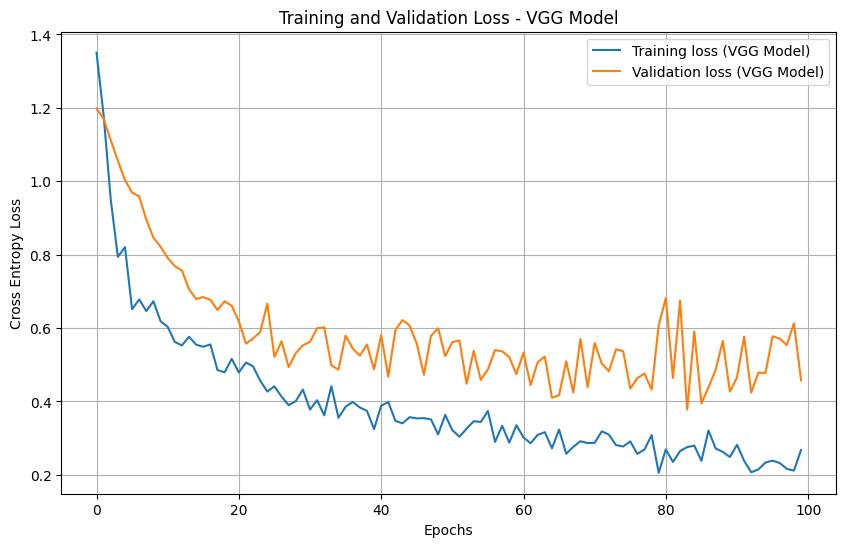

In [11]:
utils.plot_loss_curves(history_vgg, model_name="VGG Model")

#### Affichage du graphique des courbes d'accuracy:

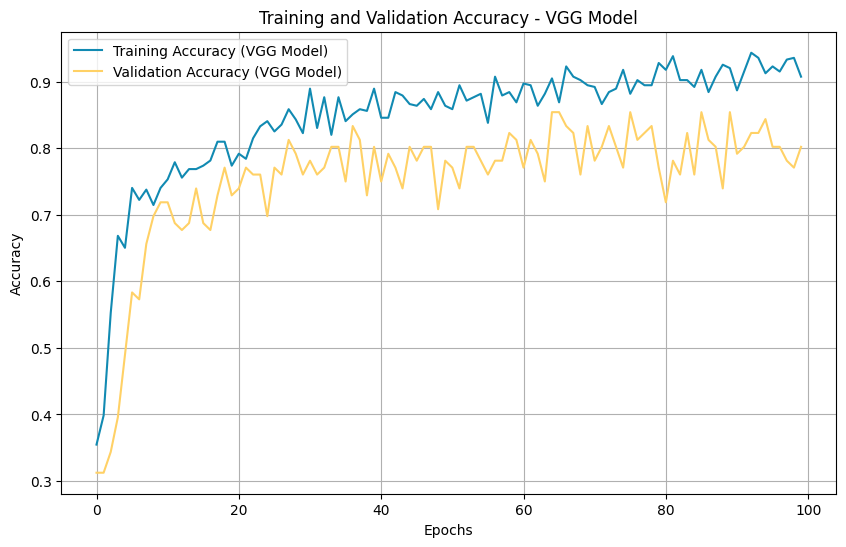

In [12]:
utils.plot_accuracy_curves(history_vgg, model_name="VGG Model", color_chart=None)

### Conclusion pour le modèle VGG16 :

#### Analyse de la Perte d'Entraînement et de Validation
- **Perte d'Entraînement (Bleu)** : La perte diminue rapidement et se stabilise à un niveau bas, montrant une bonne capacité d'apprentissage.
- **Perte de Validation (Orange)** : Bien que fluctuante, la perte de validation se stabilise, suggérant une meilleure généralisation avec quelques ajustements nécessaires.

#### Analyse de l'Accuracy d'Entraînement et de Validation
- **Accuracy d'Entraînement (Bleu)** : L'accuracy atteint 90% et reste stable, démontrant une bonne maîtrise des données d'entraînement.
- **Accuracy de Validation (Orange)** : Malgré des fluctuations, l'accuracy de validation se situe autour de 70-80%, montrant une capacité correcte de généralisation.

### Conclusion Générale :
Le modèle **VGG16** montre de bonnes performances, avec une accuracy stable pour l'entraînement et une généralisation en amélioration. Cependant, des ajustements sont nécessaires pour réduire les fluctuations et améliorer la stabilité sur les données de validation.

### Création du modèle Xception

Pour le modèle Xception, la taille d'entrée des images est configurée à (299, 299, 3), ce qui correspond aux exigences de l'architecture originale pour le traitement d'images en couleur:

In [13]:
model_xception = utils.create_xception_model(input_shape=(299, 299, 3))

# Création des générateurs de données pour l'entraînement et la validation
train_generator, validation_generator = utils.create_data_generators(img_generator, data_dir, target_size=(299, 299), batch_size=16)

Found 389 images belonging to 3 classes.
Found 96 images belonging to 3 classes.


#### Compilation du modèle Xception

In [14]:
learning_rate = 1e-4
model_xception.compile(optimizer=Adam(learning_rate=learning_rate),
                     loss='categorical_crossentropy',
                     metrics=['accuracy'])

#### Affichage du modèle:

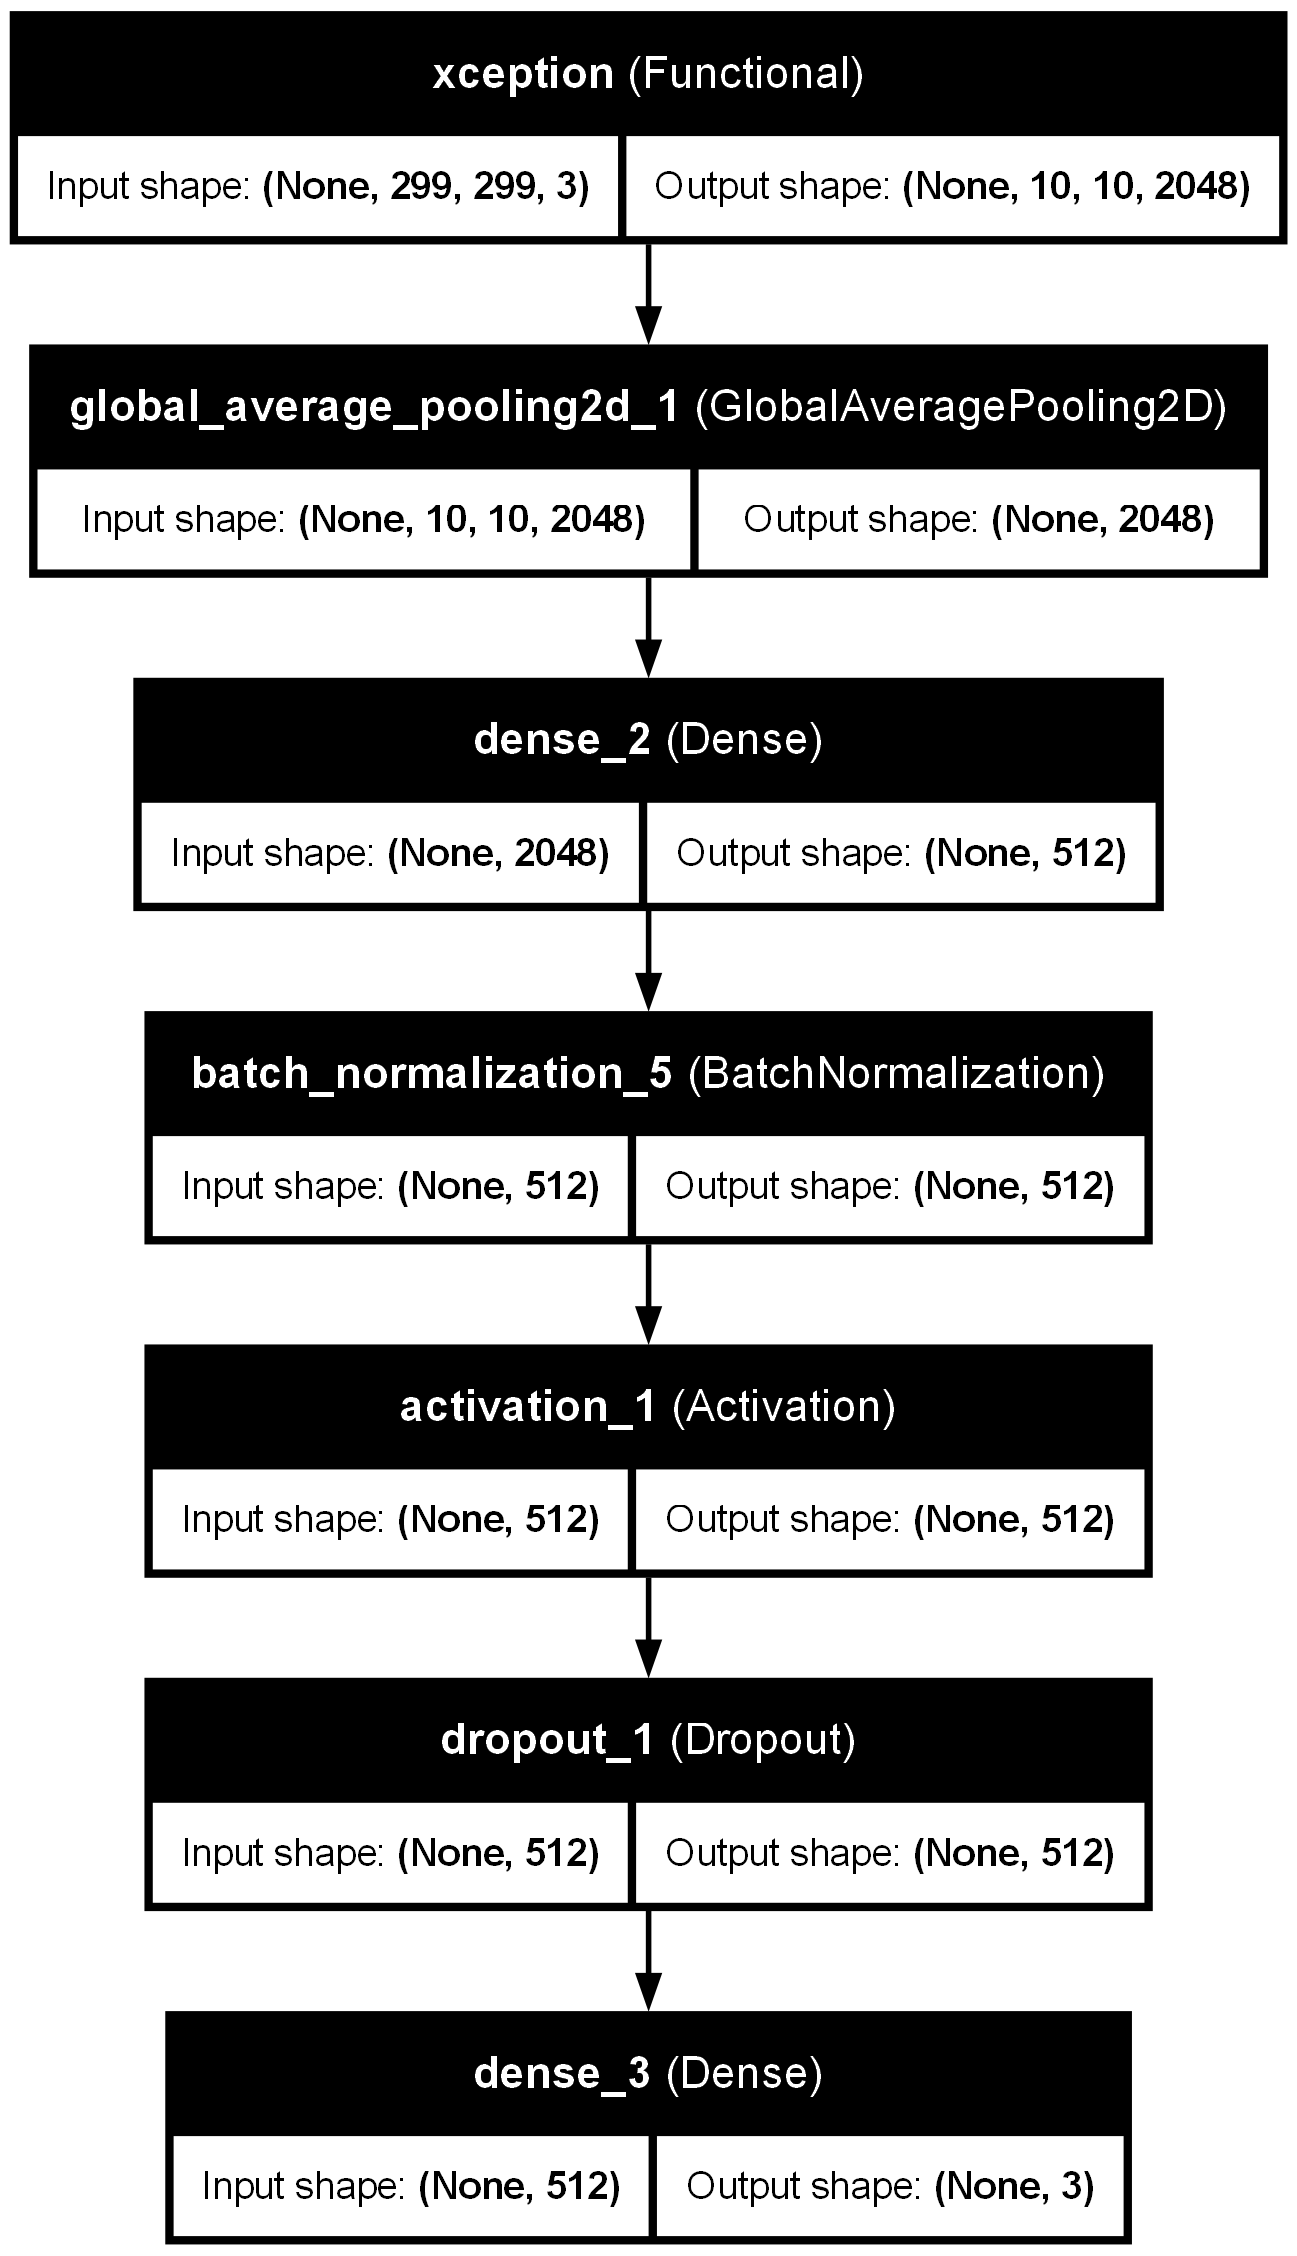

In [15]:
tf.keras.utils.plot_model(model_xception, show_shapes=True, show_layer_names=True)

#### Résumé du modèle

In [16]:
model_xception.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ xception (Functional)           │ (None, 10, 10, 2048)   │    20,861,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_1      │ (None, 2048)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 512)            │     1,049,088 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 512)            │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_1 (Activation)       │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 3)              │         1,539 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 21,914,155 (83.60 MB)

 Trainable params: 1,051,651 (4.01 MB)

 Non-trainable params: 20,862,504 (79.58 MB)

#### Entraînement du modèle

In [17]:
# Ajout du callback pour sauvegarder le modèle
checkpoint_callback = utils.get_model_checkpoint(filepath='model/xception_best_model.keras')

history_xception = model_xception.fit(
  train_generator,
  epochs=100,
  validation_data=validation_generator, 
  callbacks=[checkpoint_callback]
)

Epoch 1/100


c:\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 798ms/step - accuracy: 0.6458 - loss: 0.7671
Epoch 1: val_loss improved from inf to 0.48097, saving model to model/xception_best_model.keras
25/25 ━━━━━━━━━━━━━━━━━━━━ 37s 1s/step - accuracy: 0.6525 - loss: 0.7547 - val_accuracy: 0.9792 - val_loss: 0.4810
Epoch 2/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 826ms/step - accuracy: 0.9373 - loss: 0.1651
Epoch 2: val_loss improved from 0.48097 to 0.36316, saving model to model/xception_best_model.keras
25/25 ━━━━━━━━━━━━━━━━━━━━ 34s 1s/step - accuracy: 0.9375 - loss: 0.1649 - val_accuracy: 0.9583 - val_loss: 0.3632
Epoch 3/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 891ms/step - accuracy: 0.9781 - loss: 0.1136
Epoch 3: val_loss improved from 0.36316 to 0.27536, saving model to model/xception_best_model.keras
25/25 ━━━━━━━━━━━━━━━━━━━━ 36s 1s/step - accuracy: 0.9780 - loss: 0.1130 - val_accuracy: 0.9583 - val_loss: 0.2754
Epoch 4/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 845ms/step - accuracy: 0.9871 - loss: 0.0588
Epoch 4: val_loss impro

#### Calcul des prédictions et des classes réelles

In [18]:
# Calcul des prédictions et des classes réelles
y_pred = model_xception.predict(validation_generator)  # Prédictions du modèle sur les données de validation
y_true = validation_generator.classes          # Les vraies étiquettes des données de validation
y_pred_classes = np.argmax(y_pred, axis=1)     # Conversion des prédictions en classes prédominantes

6/6 ━━━━━━━━━━━━━━━━━━━━ 6s 909ms/step


#### Tracer la matrice de confusion

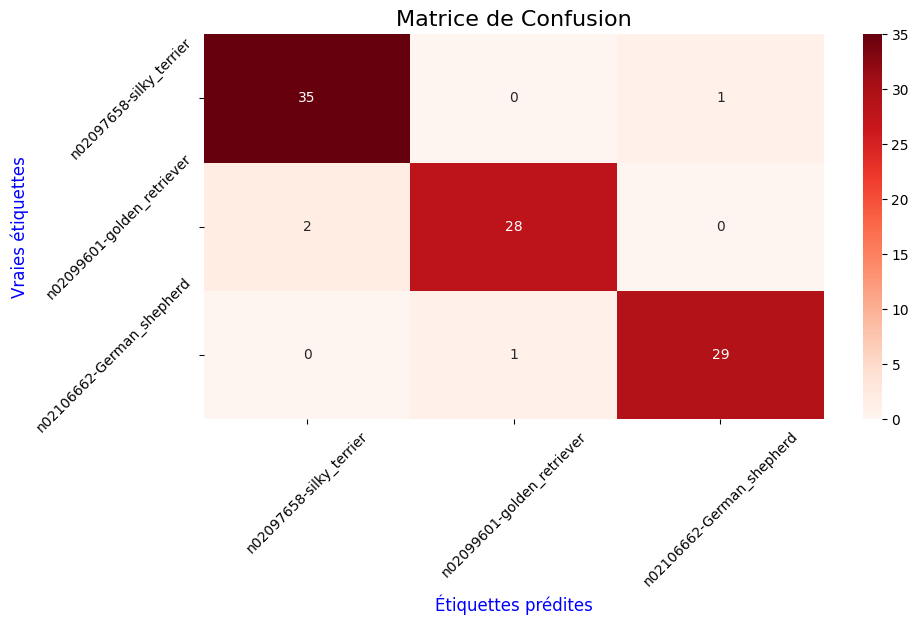

In [19]:
class_names = list(train_generator.class_indices.keys())
utils.plot_confusion_matrix(y_true, y_pred_classes, class_names)

In [20]:
df_report_xception = utils.classification_report_df(y_true, y_pred_classes, class_names)
display(df_report_xception)

,precision,recall,f1-score,support
n02097658-silky_terrier,0.95,0.97,0.96,36.00
n02099601-golden_retriever,0.97,0.93,0.95,30.00
n02106662-German_shepherd,0.97,0.97,0.97,30.00
accuracy,0.96,0.96,0.96,0.96
macro avg,0.96,0.96,0.96,96.00
weighted avg,0.96,0.96,0.96,96.00


### Conclusion du modèle Xception :

### Analyse Détaillée de la Matrice de Confusion

1. **Silky Terrier** :
   - **Vrais Positifs (TP)** : 35 Silky Terriers sont correctement identifiés.
   - **Faux Négatifs (FN)** : 1 Silky Terrier est incorrectement classifié comme **German Shepherd**.
   - **Faux Positifs (FP)** : 2 prédictions incorrectes où **2 Golden Retrievers** sont faussement identifiés comme **Silky Terriers**.

2. **Golden Retriever** :
   - **Vrais Positifs (TP)** : 28 Golden Retrievers sont correctement identifiés.
   - **Faux Négatifs (FN)** : 2 Golden Retrievers sont incorrectement classifiés comme **Silky Terriers**.
   - **Faux Positifs (FP)** : 1 prédiction incorrecte où **1 German Shepherd** est faussement identifié comme **Golden Retriever**.

3. **German Shepherd** :
   - **Vrais Positifs (TP)** : 29 German Shepherds sont correctement identifiés.
   - **Faux Négatifs (FN)** : 1 German Shepherd est incorrectement classifié comme **Golden Retriever**.
   - **Faux Positifs (FP)** : 1 prédiction incorrecte où **1 Silky Terrier** est faussement identifié comme **German Shepherd**.



### Analyse Détaillée de la Classification :

Le modèle **Xception** montre une excellente performance dans la classification des races de chiens, avec une accuracy (précision globale) de **96%** sur l'ensemble des données testées. Voici les scores F1 pour chaque classe :

- **Silky Terrier** : 
  - Précision : 95%
  - Rappel : 97%
  - F1-score : 96%
  
- **Golden Retriever** :
  - Précision : 97%
  - Rappel : 93%
  - F1-score : 95%
  
- **German Shepherd** :
  - Précision : 97%
  - Rappel : 97%
  - F1-score : 97%

Le modèle Xception montre une forte capacité à identifier les trois races avec précision. Il se distingue par sa robustesse et sa performance supérieure par rapport aux autres modèles testés.

#### Tracer les courbes de perte

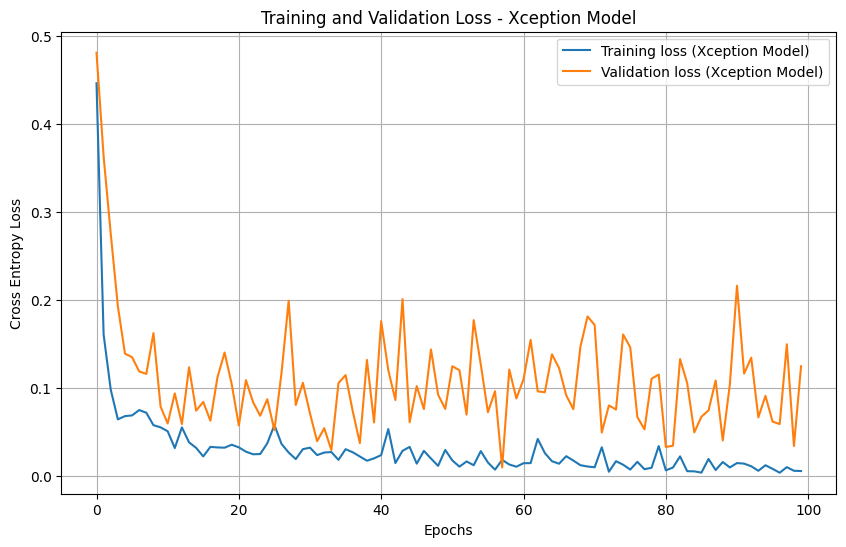

In [21]:
utils.plot_loss_curves(history_xception, model_name="Xception Model")

#### Affichage du graphique des courbes d'accuracy du modèle xception:

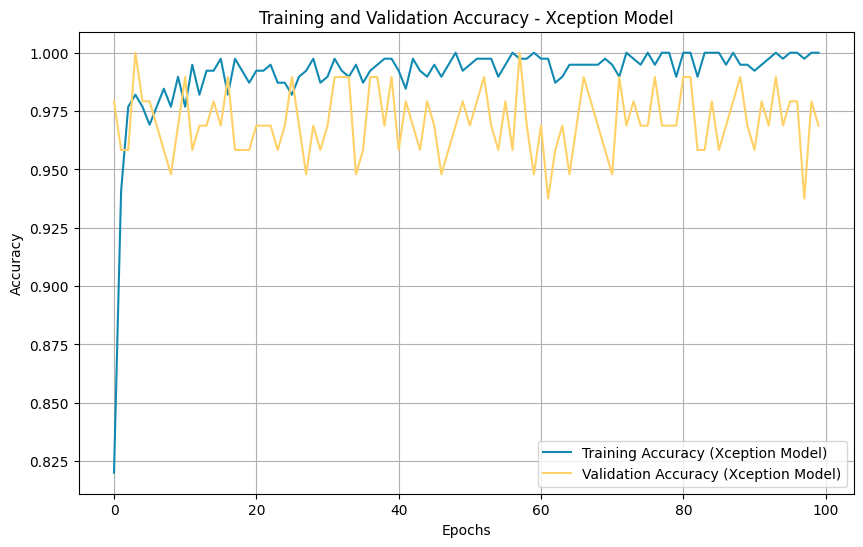

In [22]:
utils.plot_accuracy_curves(history_xception, model_name="Xception Model", color_chart=None)

### Conclusion pour le modèle Xception :

#### Analyse de la Perte d'Entraînement et de Validation
- **Perte d'Entraînement (Bleu)** : La perte diminue rapidement dès les premières époques et se stabilise autour de zéro, montrant une bonne maîtrise des données d'entraînement.
- **Perte de Validation (Orange)** : Bien que la perte fluctue tout au long des 100 époques, elle reste relativement faible, ce qui indique que le modèle généralise efficacement, bien que quelques ajustements pourraient améliorer sa stabilité.

#### Analyse de l'Accuracy d'Entraînement et de Validation
- **Accuracy d'Entraînement (Bleu)** : Le modèle atteint une accuracy proche de 100% dès le début et reste stable tout au long de l'entraînement.
- **Accuracy de Validation (Orange)** : Bien que des fluctuations existent, l'accuracy de validation reste élevée (proche de 98%), ce qui montre une bonne capacité de généralisation du modèle.

### Conclusion Générale :
Le modèle **Xception** affiche d'excellentes performances avec une accuracy élevée pour l'entraînement et la validation. Bien que la perte de validation fluctue légèrement, le modèle reste robuste et bien adapté à la classification des races de chiens.

In [23]:
# Ajout d'une colonne 'Model' pour chaque DataFrame
df_report_vgg16['Model'] = 'VGG16'
df_report_xception['Model'] = 'Xception'

# Concaténation des DataFrames
df_combined = pd.concat([df_report_vgg16, df_report_xception], axis=0)

# Affichage du DataFrame combiné pour visualisation
display(df_combined)


,precision,recall,f1-score,support,Model
n02097658-silky_terrier,0.80,0.89,0.84,36.00,VGG16
n02099601-golden_retriever,0.82,0.77,0.79,30.00,VGG16
n02106662-German_shepherd,0.82,0.77,0.79,30.00,VGG16
accuracy,0.81,0.81,0.81,0.81,VGG16
macro avg,0.81,0.81,0.81,96.00,VGG16
weighted avg,0.81,0.81,0.81,96.00,VGG16
n02097658-silky_terrier,0.95,0.97,0.96,36.00,Xception
n02099601-golden_retriever,0.97,0.93,0.95,30.00,Xception
n02106662-German_shepherd,0.97,0.97,0.97,30.00,Xception
accuracy,0.96,0.96,0.96,0.96,Xception


### Conclusion :

En comparant les modèles personnalisés **simples** et **complexes**, ainsi que les modèles de transfert learning **VGG16** et **Xception**, le modèle **Xception** se démarque clairement avec une précision globale de **96%** et des **F1-scores** très élevés pour chaque race. À titre de comparaison, le modèle **VGG16** atteint une précision de **81%**, mais montre des limitations dans la classification de certaines races.

En termes de **stabilité** et de **généralisation**, **Xception** offre de meilleures performances, avec moins de fluctuations lors de la validation et une gestion plus efficace des données.

Ainsi, **Xception** est retenu comme le **meilleur modèle**, surpassant les modèles personnalisés et **VGG16**. Il est choisi pour être utilisé dans l'API de classification des races de chiens, offrant une combinaison idéale de précision et de robustesse.